# 012.c_Sales_Outlets_Performance_Assessment

<a id='back'><a/>
# Table of Contents
    
- [1. Sales Outlets Performance Assessment Overview](#1)
- [2. General Information Overview](#2)
    - [2.1 Retail Dataset](#2.1)
    - [2.2 Product Code Dataset](#2.2)
- [3. Data Preprocessing](#3)
    - [3.1 Retail Dataset](#3.1)
        - [3.1.1 Dropping or Filling in Values](#3.1.1)
        - [3.1.2 Changing Data Types](#3.1.2)
        - [3.1.3 Duplicates](#3.1.3)
        - [3.1.4 Renaming Columns](#3.1.4)
    - [3.2 Product Code Dataset](#2.2)
        - [3.2.1 Renaming Columns](#3.2.1)
    - [3.3 File Consolidation](#3.3)
- [4. Exploratory Data Analysis](#4)
    - [4.1 Store Performance](#4.1)
        - [4.1.1 Store Revenues](#4.1.1)
        - [4.1.2 Store Unit Sales](#4.1.2)
        - [4.1.3 Revenue and Unit Sales Distribution](#4.1.3)
    - [4.2 Customer Revenue](#4.2)
    - [4.3 Product Performance](#4.3)
    - [4.4 Sales Over the Time Period](#4.4)
- [5. Hypothesis Testing](#5)
    - [5.1 Test 1](#5.1)
        - [5.1.1 Assumptions Review](#5.1.1)
        - [5.1.2 Hypothesis Test](#5.1.2)
    - [5.2 Test 2](#5.2)
        - [5.2.1 Assumptions Review](#5.2.1)
        - [5.2.2 Hypothesis Test](#5.2.2)
- [6. General Conclusions](#6)

<a id='1'><a/>
# 1 Sales Outlets Performance Assessment Overview
[Return to Table of Contents](#back)

We have been asked to assess the performance of the sales outlets of the building-material retailer chain *Home World*. We have been provided with a dataset that contains data on purchases made over a 3-month period. All of *Home World's* customers have memberships at no cost and can become members of the store's loyalty program for $20 per month. The loyalty program includes discounts, information on special offers, and gifts.

In this document you will find the analysis performed and in the link below a PDF presentation of our findings. Presentation: <https://drive.google.com/file/d/199356ZXwW-O_zcaEUVQVCY1t2M4OYk4N/view?usp=sharing>

<a id='2'><a/>
# 2 General Information Overview
[Return to Table of Contents](#back)

In [1]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from scipy import stats as st
from scipy.stats import levene
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
# read all input data

try: # local path
    retail_df= pd.read_csv('retail_dataset_us.csv')
    product_df= pd.read_csv('product_codes_us.csv',';')
except: # server path
    retail_df= pd.read_csv('/datasets/retail_dataset_us.csv')
    product_df= pd.read_csv('/datasets/product_codes_us.csv',';')

<a id='2.1'><a/>
## 2.1 Retail Dataset
[Return to Table of Contents](#back)

In [3]:
retail_df.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [4]:
retail_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.0 MB


In [5]:
first_entry = retail_df['purchasedate'].min()
last_entry = retail_df['purchasedate'].max()
print("First entry:",first_entry)
print("Last entry:",last_entry)

First entry: 2016-12-01 08:26:00
Last entry: 2017-02-28 17:04:00


In [6]:
# definitions for later calculations

time_frame_months = 3
loyalty_prog_fee = 20

In [7]:
retail_df['Quantity'].describe()

count    105335.000000
mean          7.821218
std         327.946695
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: Quantity, dtype: float64

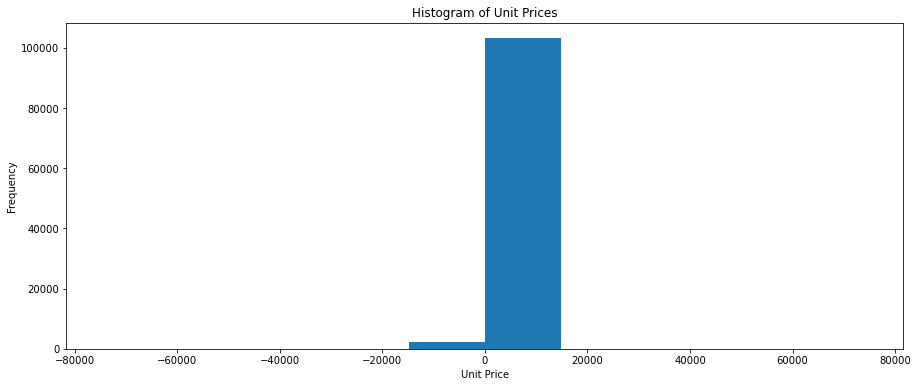

In [8]:
retail_df['Quantity'].hist(bins=10, grid=False, figsize=(15,6))

plt.title("Histogram of Unit Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.yticks(rotation=0)

plt.show()

There are negative values in "Quantity"

In [9]:
for c in retail_df.select_dtypes(include ='object').columns: 
    print()
    print(c)
    print(retail_df[c].value_counts())


purchaseid
537434     675
538071     652
538349     620
537638     601
537237     597
          ... 
C544279      1
539005       1
539734       1
536810       1
C539712      1
Name: purchaseid, Length: 4894, dtype: int64

item_ID
85123A    565
22423     499
22469     414
22720     377
85099B    372
         ... 
90130D      1
90152C      1
71496B      1
37489D      1
90011E      1
Name: item_ID, Length: 3159, dtype: int64

purchasedate
2016-12-06 16:57:00    675
2016-12-09 14:09:00    652
2016-12-10 14:59:00    621
2016-12-07 15:28:00    601
2016-12-06 09:58:00    597
                      ... 
2017-02-11 15:22:00      1
2017-01-31 11:33:00      1
2017-01-05 09:55:00      1
2016-12-21 10:35:00      1
2016-12-15 14:33:00      1
Name: purchasedate, Length: 4430, dtype: int64

ShopID
Shop 0     38389
Shop 1      2744
Shop 15     2710
Shop 24     2656
Shop 22     2601
Shop 5      2510
Shop 9      2496
Shop 13     2448
Shop 20     2435
Shop 14     2400
Shop 30     2395
Shop 7      2368
Sho

In [10]:
retail_df.duplicated().sum()

1033

In the retail dataset that we were provided, 105,335 purchases were made in 30 stores. There is a significant amount of pre-processing that needs to be done. The below will need to be addressed:

- There are over 30,000 missing values in the series 'CustomerID' that we will try to fill. Filling in this information will not affect our results, but make the data able to be manipulated
- There are 1,033 duplicate values, which we will likely drop, representing 1% of our data.
- The formatting and clarity of column names can be improved
- There are negative values in the series 'Quantity' that need to be explored
- The file is a little on the large side, this may be improved with some needed type conversion

<a id='2.2'><a/>
## 2.2 Product Code Dataset
[Return to Table of Contents](#back)

In [11]:
product_df.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [12]:
product_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 217.0 KB


In [13]:
product_df.describe()

,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


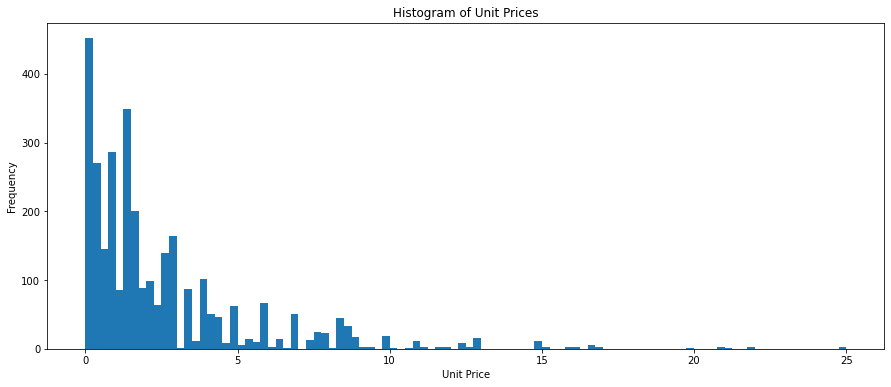

In [14]:
product_df['price_per_one'].hist(bins=100, range=[0,25], grid=False, figsize=(15,6))

plt.title("Histogram of Unit Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.yticks(rotation=0)

plt.show()

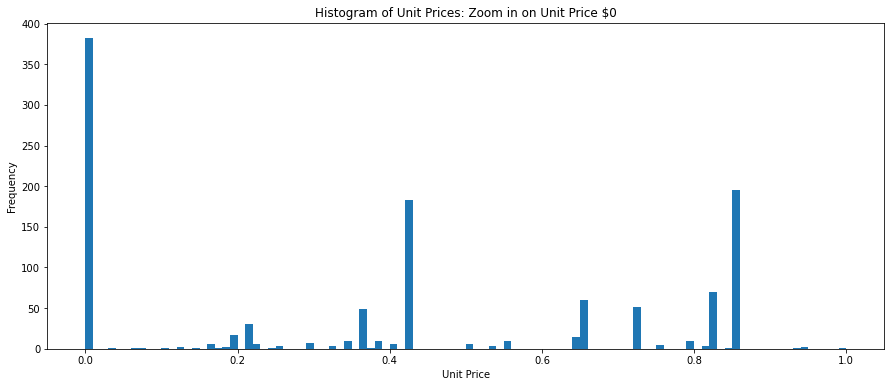

In [15]:
product_df['price_per_one'].hist(bins=100, range=[0,1], grid=False, figsize=(15,6))

plt.title("Histogram of Unit Prices: Zoom in on Unit Price $0")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.yticks(rotation=0)

plt.show()

The mean is greater than the median, meaning positive skew, meaning that there are many small observations on price and a few extreme observations. We should focus on median as it is not influenced by those extremes.

In [16]:
# check on unit prices == 0

product_df[product_df['price_per_one'] == 0].count()

productID        382
price_per_one    382
dtype: int64

In [17]:
product_df.duplicated().sum()

0

There are over 3,000 different products with unit costs ranging from USD 0-175. The USD 0 unit cost may be free items, but there is no way of knowing. The dataset was relatively clean. The only item that will need to be addressed is that the formatting and clarity of column names can be improved.

Once this is complete, the two files will be merged.

<a id='3'><a/>
# 3 Data Preprocessing
[Return to Table of Contents](#back)

<a id='3.1'><a/>
## 3.1 Retail Dataset
[Return to Table of Contents](#back)

<a id='3.1.1'><a/>
### 3.1.1 Dropping or Filling in Values
[Return to Table of Contents](#back)

In [18]:
# missing values as a percentage of the entire dataset

round(retail_df.isnull().sum() / len(retail_df),4)*100

purchaseid          0.00
item_ID             0.00
Quantity            0.00
purchasedate        0.00
CustomerID         34.38
loyalty_program     0.00
ShopID              0.00
dtype: float64

34.38% of missing values in the series 'CustomerID' is highly significant and thus the rows cannot be dropped. However given the data that was provided to us, there is no way to fill in the missing values such that we can estimate a CustomerID. We will thus fill them in with 0.

In [19]:
# filling in missing values for CustomerID with 0

retail_df['CustomerID'].fillna(0,inplace=True)

In [20]:
# negative and zero values in the series 'Quantity'

print(retail_df[retail_df['Quantity']<0].shape)
print(retail_df[retail_df['Quantity']==0].shape)

(2118, 7)
(33055, 7)


In [21]:
# check to see if there are any correlations between a 0 quantity and other variables.

retail_df[retail_df['Quantity']==0].corr()

,Quantity,CustomerID,loyalty_program
Quantity,NaN,NaN,NaN
CustomerID,NaN,1.000000,0.639446
loyalty_program,NaN,0.639446,1.000000


There seems to be somewhat of a correlation between 0 quantity purchases and membership in the loyalty program. They are likely free items. We will not drop them.

In [22]:
# dropping negative values

retail_df = retail_df[retail_df['Quantity'] >= 0]

Dropping the negative values represents 1.5% of our dataset.

In [23]:
# determining the outliers in the series 'Quantity'

Q1 = retail_df['Quantity'].quantile(0.25)
Q3 = retail_df['Quantity'].quantile(0.75)

print("First quartile:", Q1)
print("Third quartile:", Q3)

IQR= Q3-Q1
upper_limit = Q3+1.5*IQR
print("Upper Limit: {}".format(upper_limit))
lower_limit = Q3-1.5*IQR
print("Lower Limit: {}".format(lower_limit))
    
retail_df = retail_df[retail_df['Quantity'] <= upper_limit]

First quartile: 0.0
Third quartile: 8.0
Upper Limit: 20.0
Lower Limit: -4.0


In [24]:
retail_df.sample()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
93748,539017,22722,3,2016-12-15 13:50:00,19097.0,0,Shop 16


Negative values may be returns, but since there is no way of knowing, and they represent only ~2% of our dataset, we will drop them. Will leave zero values for now as they represent 1/3 of our dataset, we should attempt to investigate what these could be. Any quantity above 20 will be dropped as those purchases are outliers that will skew the results of our analysis.

<a id='3.1.2'><a/>
### 3.1.2 Changing Data Types
[Return to Table of Contents](#back)

In [25]:
# dropping the 'Shop' in the string so that the store IDs can be more easily manipulated

retail_df['shop_id_int']= retail_df['ShopID'].str.replace(r'\D', '').astype(int)

In [26]:
for col in ['purchaseid','CustomerID']:
    retail_df[col] = retail_df[col].astype('int')

In [27]:
retail_df['purchasedate']= pd.to_datetime(retail_df['purchasedate'])

In [28]:
retail_df['purchase_day'] = retail_df['purchasedate'].dt.to_period('D')
retail_df['purchase_week'] = retail_df['purchasedate'].dt.to_period('W')
retail_df['purchase_month'] = retail_df['purchasedate'].dt.to_period('M')

<a id='3.1.3'><a/>
### 3.1.3 Duplicates
[Return to Table of Contents](#back)

In [29]:
print(retail_df.shape)
retail_df.drop_duplicates(inplace=True)
print(retail_df.shape)

(93402, 11)
(92429, 11)


<a id='3.1.4'><a/>
### 3.1.4 Renaming Columns
[Return to Table of Contents](#back)

In [30]:
(retail_df.rename(columns=
                  {'purchaseid':'purchase_id', 
                   'item_ID':'product_id',
                   'Quantity':'quantity',
                   'purchasedate':'purchase_date',
                   'CustomerID':'customer_id',
                   'ShopID':'shop_id',}, inplace=True))

<a id='3.2'><a/>
## 3.2 Product Code Dataset
[Return to Table of Contents](#back)

<a id='3.2.1'><a/>
### 3.2.1 Renaming Columns
[Return to Table of Contents](#back)

In [31]:
product_df.rename(columns={'productID':'product_id', 'price_per_one':'unit_price',}, inplace=True)

<a id='3.3'><a/>
## 3.3 File Consolidation
[Return to Table of Contents](#back)

In [32]:
# combining the files

retail_test = retail_df
product_test = product_df

performance_df = retail_test.merge(product_test, on='product_id')

In [33]:
# adding column for total revenues 

performance_df['revenues'] = performance_df['quantity']*performance_df['unit_price']

performance_df.sample()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,shop_id_int,purchase_day,purchase_week,purchase_month,unit_price,revenues
22030,537240,21524,0,2016-12-06 10:08:00,0,0,Shop 0,0,2016-12-06,2016-12-05/2016-12-11,2016-12,6.75,0.0


<a id='4'><a/>
# 4 Exploratory Data Analysis
[Return to Table of Contents](#back)

In [34]:
# initial look for any interesting correlations

performance_df.corr()

,purchase_id,quantity,customer_id,loyalty_program,shop_id_int,unit_price,revenues
purchase_id,1.000000,0.059854,0.050382,-0.002783,0.034747,0.009879,0.033846
quantity,0.059854,1.000000,0.329183,0.050237,0.261293,-0.123692,0.504394
customer_id,0.050382,0.329183,1.000000,0.518202,0.708971,0.057983,0.230355
loyalty_program,-0.002783,0.050237,0.518202,1.000000,0.284626,0.011268,0.034687
shop_id_int,0.034747,0.261293,0.708971,0.284626,1.000000,0.045685,0.178599
unit_price,0.009879,-0.123692,0.057983,0.011268,0.045685,1.000000,0.310397
revenues,0.033846,0.504394,0.230355,0.034687,0.178599,0.310397,1.000000


With our data cleaned, we can see one clear correlation between 'shop_id' and 'customer_id', meaning that customers usually go to one store (probably the store that is located nearest to them).

<a id='4.1'><a/>
## 4.1 Store Performance
[Return to Table of Contents](#back)

<a id='4.1.1'><a/>
### 4.1.1 Store Revenues
[Return to Table of Contents](#back)

In [35]:
rev_per_shop = performance_df.groupby('shop_id_int')['revenues'].sum().sort_values(ascending=False).to_frame()
top_shops_rev = rev_per_shop.nlargest(10,'revenues')

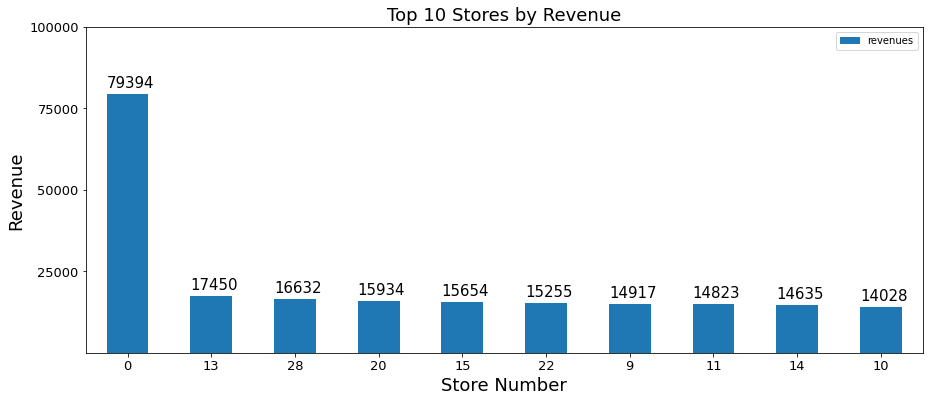

In [36]:
ax = top_shops_rev.plot(kind='bar', figsize=(15,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top 10 Stores by Revenue", fontsize=18)
ax.set_ylabel("Revenue", fontsize=18)
ax.set_xlabel('Store Number', fontsize=18)
ax.set_yticks([25000, 50000, 75000, 100000])
plt.xticks(rotation=360)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2000, \
            str(round(i.get_height())), fontsize=15, color='black')

<a id='4.1.2'><a/>
### 4.1.2 Store Unit Sales
[Return to Table of Contents](#back)

In [37]:
unit_sales_per_shop = performance_df.groupby('shop_id_int')['quantity'].sum().sort_values(ascending=False).to_frame()
top_shops_units = unit_sales_per_shop.nlargest(10,'quantity')

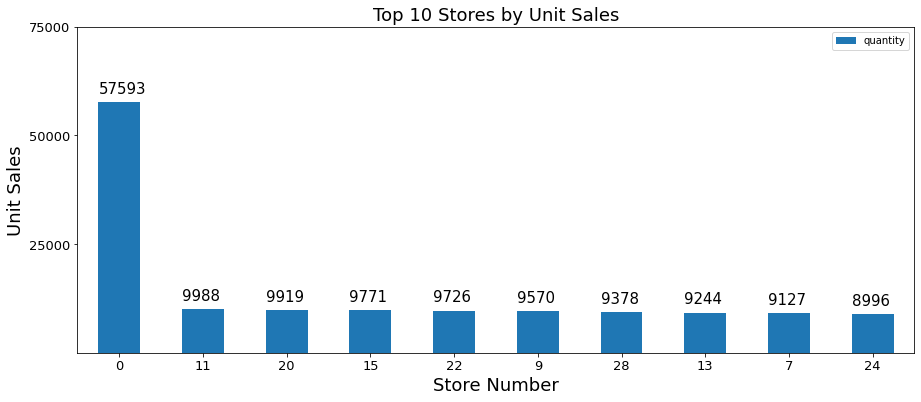

In [38]:
ax = top_shops_units.plot(kind='bar', figsize=(15,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top 10 Stores by Unit Sales", fontsize=18)
ax.set_ylabel("Unit Sales", fontsize=18)
ax.set_xlabel('Store Number', fontsize=18)
ax.set_yticks([25000, 50000, 75000])
plt.xticks(rotation=360)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2000, \
            str(round(i.get_height())), fontsize=15, color='black')

<a id='4.1.3'><a/>
### 4.1.3 Revenue and Unit Sales per Transaction
[Return to Table of Contents](#back)

In [39]:
# filtering for top shops

unit_sales_value_list = top_shops_units.index[:]
unit_sales_boolean_series = performance_df.shop_id_int.isin(unit_sales_value_list)
unit_sales_filtered_df = performance_df[unit_sales_boolean_series]

rev_value_list = top_shops_rev.index[:]
rev_sales_boolean_series = performance_df.shop_id_int.isin(rev_value_list)
rev_sales_filtered_df = performance_df[rev_sales_boolean_series]

# limiting purchases to under $150 to remove outliers

rev_sales_under_150 = rev_sales_filtered_df[rev_sales_filtered_df['revenues'] < 150]

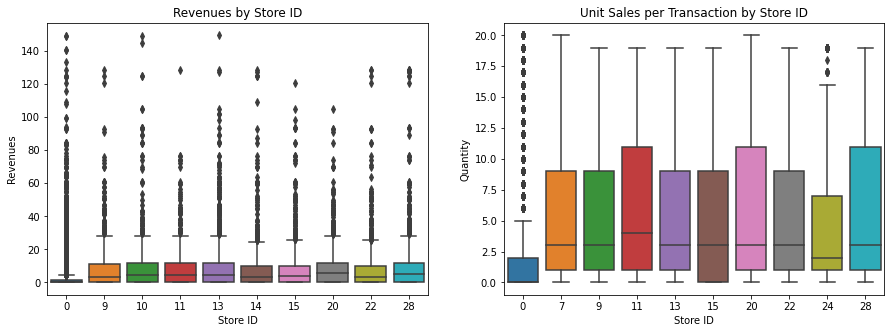

In [40]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(y="revenues", x= "shop_id_int", data=rev_sales_under_150, ax=axes[0])
axes[0].set_title('Revenues by Store ID')
axes[0].set_xlabel('Store ID')
axes[0].set_ylabel('Revenues')
sns.boxplot(y="quantity", x= "shop_id_int", data=unit_sales_filtered_df, ax=axes[1])
axes[1].set_title('Unit Sales per Transaction by Store ID')
axes[1].set_xlabel('Store ID')
axes[1].set_ylabel('Quantity')

plt.show()

In [41]:
# store 0 mean and median

(print("Store 0 average revenue from sale is {:.2f}"
       .format(performance_df[(performance_df['revenues'] != 0) & 
                              (performance_df['shop_id_int'] == 0)]['revenues'].mean())))

(print("Store 0 median revenue from sale is {:.2f}"
       .format(performance_df[(performance_df['revenues'] != 0) & 
                              (performance_df['shop_id_int'] == 0)]['revenues'].median())))

Store 0 average revenue from sale is 5.49
Store 0 median revenue from sale is 2.90


The mean is greater than the median, meaning positive skew, (i.e. that there are many small observations on price and a few extreme observations). We should focus on median as it is not influenced by those extremes.

In [42]:
# all other stores mean and median

(print("All other stores average revenue from sale is {:.2f}"
       .format(performance_df[(performance_df['revenues'] != 0) & 
                              (performance_df['shop_id_int'] != 0)]['revenues'].mean())))

(print("All other stores median revenue from sale is {:.2f}"
       .format(performance_df[(performance_df['revenues'] != 0) & 
                              (performance_df['shop_id_int'] != 0)]['revenues'].median())))

All other stores average revenue from sale is 11.11
All other stores median revenue from sale is 8.50


Store 0 is the best performing store by revenues, which is driven by more units sold versus a higher average sales price. We will confirm this through a t-test.

<a id='4.2'><a/>
## 4.2 Product Performance
[Return to Table of Contents](#back)

In [43]:
# defining the top 10 performing products by total revenues

top_products = (performance_df.groupby(['product_id'])['revenues'].sum().sort_values(ascending=False)
                .head(10))

In [44]:
# determining top products % contribution to sales

top_products_total_rev = top_products.sum()
total_sales = performance_df['revenues'].sum()

print("Top 10 performing products by revenue contribute {:.2%} to total sales"
      .format(top_products_total_rev / total_sales))

Top 10 performing products by revenue contribute 6.33% to total sales


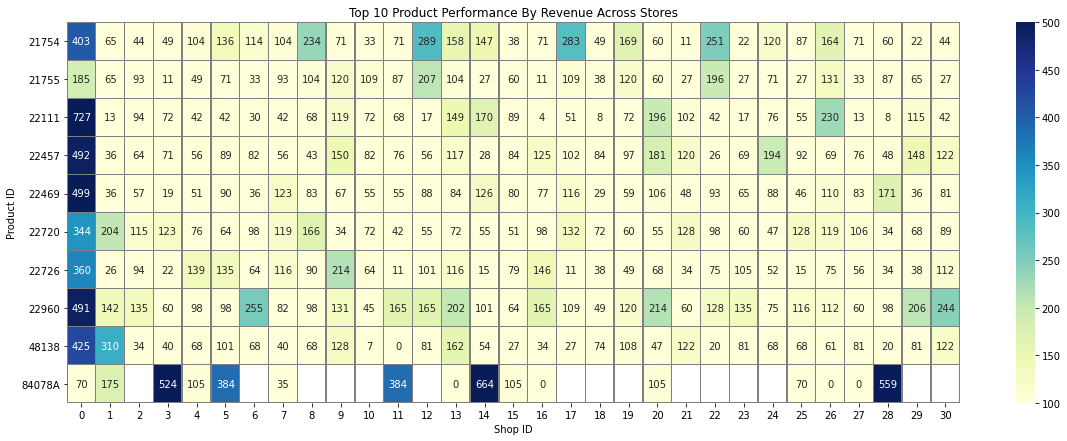

In [45]:
# filtering data for top 10

top_products_list = top_products.index[:]
top_products_boolean_series = performance_df.product_id.isin(top_products_list)
top_stores_products_filtered_df = performance_df[top_products_boolean_series]

# creating pivot table

top_products_pivot = (top_stores_products_filtered_df.pivot_table(index='product_id', 
                                                                  columns='shop_id_int',
                                                                  values='revenues', aggfunc='sum'))

# creating heatmap

plt.figure(figsize=(20, 7))
sns.heatmap(data=top_products_pivot, annot=True, linewidths=.5, fmt=".0f", linecolor='gray', cmap="YlGnBu", vmin=100, vmax=500)

plt.title("Top 10 Product Performance By Revenue Across Stores")
plt.xlabel("Shop ID")
plt.ylabel("Product ID")
plt.yticks(rotation=0)

plt.show()

<a id='4.3'><a/>
## 4.3 Sales Over the Time Period
[Return to Table of Contents](#back)

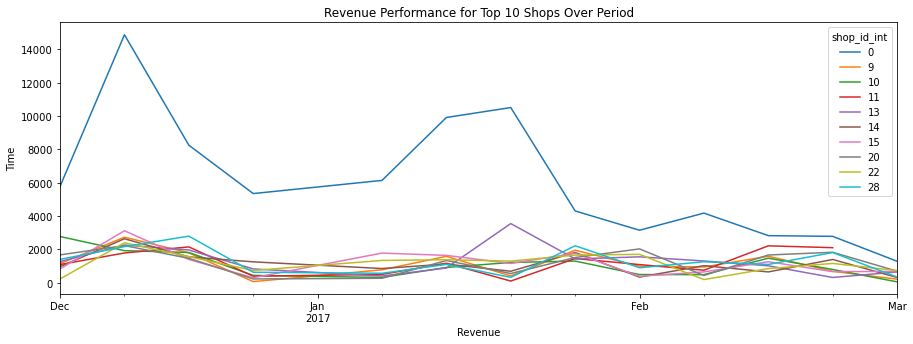

In [46]:
# plotting sales over period by week to smooth out revenues

(rev_sales_filtered_df.groupby(['purchase_week','shop_id_int'])['revenues'].sum()
 .unstack(1).plot(figsize=(15, 5)))

plt.title("Revenue Performance for Top 10 Shops Over Period")
plt.xlabel("Revenue")
plt.ylabel("Time")

plt.show()

There was a spike in sales for store 0 before the holidays and another mid February, at which point sales started to fall and converge with other shops.

<a id='4.4'><a/>
## 4.4 Store 0
[Return to Table of Contents](#back)

<a id='4.4'><a/>
## 4.4 Customer Revenue
[Return to Table of Contents](#back)

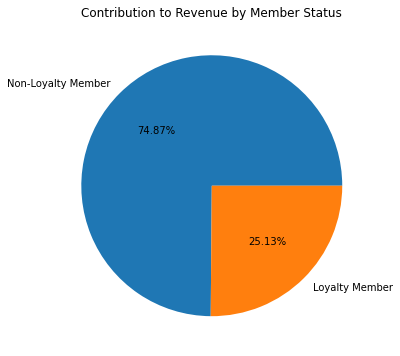

In [47]:
# determining revenue contribution based on membership

loyalty_v_non = performance_df.groupby(['customer_id','loyalty_program'])['revenues'].sum().unstack(1)

# creating pie graph

(loyalty_v_non.sum().plot(kind='pie', autopct='%.2f%%', figsize=(6, 6),
                          labels=['Non-Loyalty Member','Loyalty Member']))

plt.title('Contribution to Revenue by Member Status')
plt.ylabel("")
plt.show()

In [48]:
reg_members = loyalty_v_non[0].count()
loyalty_prog_members = loyalty_v_non[1].count()

print("There are {} members who are regular members, NOT in the loyalty program.".format(reg_members))
print("There are {} members who are in the loyalty program.".format(loyalty_prog_members))

There are 1059 members who are regular members, NOT in the loyalty program.
There are 542 members who are in the loyalty program.


In [49]:
# calculating revenue contribution for loyalty v. non members

reg_members_rev = loyalty_v_non[0].sum()
loyalty_program_rev = loyalty_prog_members*time_frame_months*loyalty_prog_fee
loyalty_members_rev = loyalty_v_non[1].sum()
total_loyalty_rev = + loyalty_program_rev + loyalty_members_rev

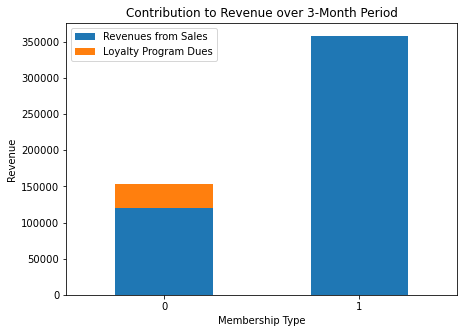

In [50]:
# creating dataframe

df_rev = pd.DataFrame(columns=['Revenues from Sales','Loyalty Program Dues'])

# adding loyalty revenues

df_rev = (df_rev.append({'Revenues from Sales': loyalty_members_rev, 'Loyalty Program Dues': loyalty_program_rev}, 
                        ignore_index=True))

# adding regular revenues

df_rev = (df_rev.append({'Revenues from Sales': reg_members_rev}, 
                        ignore_index=True))

# creating bar chart

df_rev.plot(kind='bar', stacked=True, figsize=(7,5))

plt.title('Contribution to Revenue over 3-Month Period')
plt.xlabel('Membership Type')
plt.ylabel('Revenue')
plt.xticks(rotation=0)

plt.show()

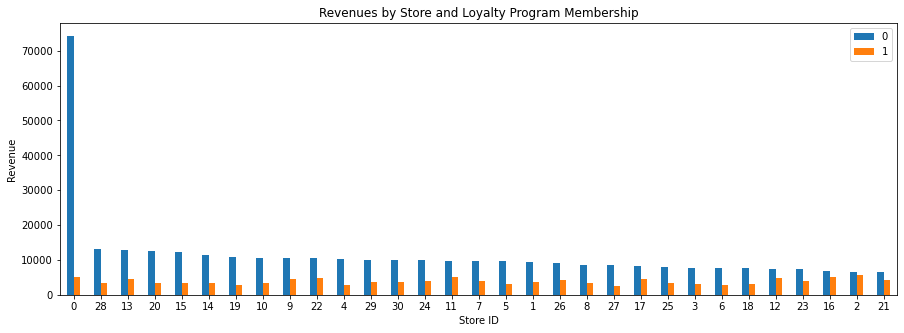

In [51]:
(performance_df.groupby(['shop_id_int','loyalty_program'])['revenues'].sum().
 unstack().sort_values(by=0,ascending=False).plot(kind='bar', figsize=(15,5), label=['Reg Member', 'Loyalty Member']))

plt.title('Revenues by Store and Loyalty Program Membership')
plt.xlabel('Store ID')
plt.ylabel('Revenue')
plt.legend(loc='upper right')
plt.xticks(rotation=360)

plt.show()

<a id='5'><a/>
# 5 Hypothesis Testing
[Return to Table of Contents](#back)

In [52]:
store_0 = performance_df[performance_df['shop_id_int'] == 0]

In [53]:
all_other_stores = performance_df[performance_df['shop_id_int'] != 0]

In [54]:
store_0[['quantity','unit_price','revenues']].corr()

,quantity,unit_price,revenues
quantity,1.000000,-0.106873,0.586781
unit_price,-0.106873,1.000000,0.236256
revenues,0.586781,0.236256,1.000000


<AxesSubplot:xlabel='quantity', ylabel='revenues'>

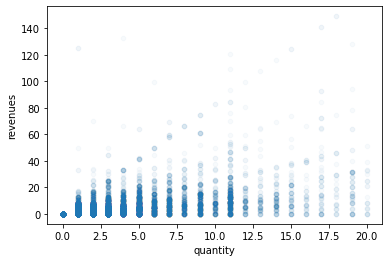

In [55]:
store_0.plot(x='quantity', y='revenues', kind='scatter', alpha=0.03) 

In [56]:
all_other_stores[['quantity','unit_price','revenues']].corr()

,quantity,unit_price,revenues
quantity,1.000000,-0.163813,0.441031
unit_price,-0.163813,1.000000,0.321762
revenues,0.441031,0.321762,1.000000


<AxesSubplot:xlabel='quantity', ylabel='revenues'>

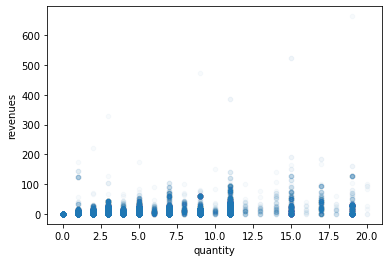

In [57]:
all_other_stores.plot(x='quantity', y='revenues', kind='scatter', alpha=0.03) 

In [58]:
store_0[['quantity','unit_price','revenues']].describe()

,quantity,unit_price,revenues
count,37212.000000,37212.000000,37212.000000
mean,1.547700,1.912430,2.133549
std,2.911394,2.655758,6.041536
min,0.000000,0.000000,0.000000
25%,0.000000,0.420000,0.000000
50%,0.000000,1.250000,0.000000
75%,2.000000,2.510000,1.700000
max,20.000000,125.000000,149.220000


In [59]:
all_other_stores[['quantity','unit_price','revenues']].describe()

,quantity,unit_price,revenues
count,55217.000000,55217.000000,55217.000000
mean,4.474673,2.338039,7.226784
std,4.521430,4.367998,12.346888
min,0.000000,0.000000,0.000000
25%,1.000000,0.650000,0.000000
50%,3.000000,1.450000,3.750000
75%,9.000000,2.950000,10.900000
max,20.000000,175.000000,664.050000


For this analysis we will be performing statistical tests using t-tests:

<ul>
 <li>Test 1: Average revenue per order for Shop 0 and all other shops are the same</li>
 <li>Test 2: Average revenue per order amongst members in the loyalty program and those NOT in the loyalty program is different</li>
 </ul>

<a id='5.1'><a/>
## 5.1 Test 1
[Return to Table of Contents](#back)

<a id='5.1.1'><a/>
### 5.1.1 Assumptions Review
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): average revenues per order for Shop 0 = average revenues per order for all other shops </li>
 <li>H1 (alternative hypothesis): average revenues per order for Shop 0 <> average revenues per order for all other shops </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

In [60]:
# before testing hypothesis with T-test, we must check sample variance for homogeneity

stat, p = levene(performance_df[(performance_df['revenues'] != 0) & (performance_df['shop_id_int'] == 0)]['revenues'],performance_df[(performance_df['revenues'] != 0) & (performance_df['shop_id_int'] != 0)]['revenues'])
p

1.7625973482613677e-136

The p-value (i.e. < than 0.05) suggests that the populations do NOT have equal variances.

<a id='5.1.2'><a/>
### 5.1.2 Hypothesis Test
[Return to Table of Contents](#back)

In [61]:
(st.ttest_ind(performance_df[(performance_df['revenues'] != 0) & (performance_df['shop_id_int'] == 0)]['revenues'],
              performance_df[(performance_df['revenues'] != 0) & (performance_df['shop_id_int'] != 0)]['revenues'],equal_var=False))

Ttest_indResult(statistic=-54.675684996933576, pvalue=0.0)

The p_value < 0.05 and thus we reject the null hypothesis of equal averages. There is a statistical difference between the average revenues for store 0 and all other stores, meaning that the average revenues per order are not the same, which we saw earlier in our analysis.

<a id='5.2'><a/>
## 5.2 Test 2
[Return to Table of Contents](#back)

<a id='5.2.1'><a/>
### 5.2.1 Assumptions Review
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): average revenues per order for loyalty program members == average revenues per order for NON loyalty program members </li>
 <li>H1 (alternative hypothesis): average revenues per order for loyalty program members <> average revenues per order for NON loyalty program members </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

In [62]:
# before testing hypothesis with T-test, we must check sample variance for homogeneity

stat, p = levene(performance_df[(performance_df['revenues'] != 0) & (performance_df['loyalty_program'] == 1)]['revenues'],performance_df[(performance_df['revenues'] != 0) & (performance_df['loyalty_program'] == 0)]['revenues'])
p

0.07140452137959107

The p-value (i.e. > than 0.05) suggests that the populations do have equal variances.

<a id='5.2.2'><a/>
### 5.2.2 Hypothesis Test
[Return to Table of Contents](#back)

In [63]:
performance_df.sample()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,shop_id_int,purchase_day,purchase_week,purchase_month,unit_price,revenues
32694,542625,22621,0,2017-01-31 09:50:00,0,0,Shop 0,0,2017-01-31,2017-01-30/2017-02-05,2017-01,1.25,0.0


In [64]:
(st.ttest_ind(performance_df[(performance_df['revenues'] != 0) & (performance_df['loyalty_program'] == 1)]['revenues'],
              performance_df[(performance_df['revenues'] != 0) & (performance_df['loyalty_program'] == 0)]['revenues']))

Ttest_indResult(statistic=1.0682637818083336, pvalue=0.28540666158432787)

The p_value > 0.05 and thus we fail to reject the null hypothesis of equal averages. There may not be a statistical difference between the average revenues for loyalty members and non loyalty program members.

<a id='6'><a/>
# 6 General Conclusions
[Return to Table of Contents](#back)

**Data Processing**

We were provided with two files for this analysis. In the retail dataset that we were provided, 105,335 purchases were made in 30 stores. There was a significant amount of pre-processing that needed to be done including filling in 30,000 missing values in the series 'CustomerID', dropping 1,033 duplicate, formatting and improving clarity of column names, dropping negative values in the series 'Quantity'. In the product dataset there are over 3,000 different products with unit costs ranging from USD 0-175. The dataset was relatively clean. Once completed the files were merged.

**Exploratory Data Analysis**

Store 0, perhaps the flagship store, is the top performing store by revenue and by units sold. Store 0 accounts for 16.6% of total revenue, while the next top 9 stores account for 3-3.5% each. Store 0 average sales price is USD 5.33 vs 10.85. A t-test confirmed a statistical difference between the average revenues for store 0 and all other stores. The majority of unit prices are below $10 with no bucket of products contributing disproportionately to revenue. The top-performing product, item 22960 contributes < 1 percent to total revenues. 

There are 541 members in the loyalty program and 1,056 non-loyalty program members. Non-Loyalty program members brought in 343,571 dollars of revenue over the period. Loyalty program members brought in 149,929 dollars of revenue over the period, including the $20 monthly membership fee. Loyalty program members bring in 64,547 dollars LESS in monthly revenue. The vast majority of revenues are derived from non-loyalty versus loyalty members. A t-test was unable to reject the hypothesis that there is a statistical difference between the average revenues for loyalty and non loyalty program members. Sales we generally higher in the weeks leading up to December holidays.

**Recommendations to Management**

Our analysis showed that we do not need to focus on selling more of particular products (as revenues are distributed broadly across the product catalog) or increasing membership in our loyalty program (Loyalty program members bring in 64,547 dollars LESS in monthly revenue). We should instead focus on selling high volumes of lower cost items, which is Store O's winning strategy. 

For further analysis, we recommend examining the costs associated with the loyalty program as it might be worth cancelling.